In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pickle as pkl
import time
import seaborn as sns
import pandas as pd
pd.options.display.max_rows = 999

In [11]:
df = pd.read_excel('../energy_query.xlsx' )

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'DutchGas', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'European Crude Brent', 'Unnamed: 8',
       'Unnamed: 9', 'German Baseload', 'Unnamed: 11', 'Unnamed: 12',
       'GB Natural Gas', 'Unnamed: 14', 'Unnamed: 15', 'French Baseload',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'UK',
       'Unnamed: 22', 'Unnamed: 23', 'Italy', 'Unnamed: 25', 'Unnamed: 26',
       'Spain', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Hungary', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'German Natural Gas', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Czechia', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'nETHERLANDA', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'AUSTRIA', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Poland', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed:

In [13]:
sweden_base = df.iloc[:,82:84]
romania_base = df.iloc[:,85:87]
bulgaria_base = df.iloc[:,90:92]


czechia_base = df.iloc[:,42:44]
dutch_base = df.iloc[:,47:49]
austria_base = df.iloc[:,52:54]
poland_base = df.iloc[:,57:59]
greece_base = df.iloc[:,62:64]
swiss_base = df.iloc[:,72:74]
belgium_base = df.iloc[:,67:69]
denmark_base = df.iloc[:,77:79]

dutch_gas = df.iloc[:,2:4]
european_brent = df.iloc[:,7:9]
german_energy = df.iloc[:,10:12]
brit_gas = df.iloc[:,13:15]
french_base = df.iloc[:,16:18]
uk_base = df.iloc[:,21:23]
italy_base = df.iloc[:,24:26]
spain_base = df.iloc[:,27:29]
hungary_base = df.iloc[:,32:34]
german_gas = df.iloc[:,37:39]


In [14]:
dfs = [european_brent, romania_base , bulgaria_base , czechia_base , dutch_base , austria_base , poland_base , greece_base , swiss_base , belgium_base  , dutch_gas ,  german_energy , brit_gas , french_base , uk_base ,  spain_base , hungary_base , german_gas]
excluded = [sweden_base, denmark_base, italy_base]
df_names = ['european_brent', 'romania_base', 'bulgaria_base', 'czechia_base', 'dutch_base', 'austria_base', 'poland_base', 'greece_base', 'swiss_base', 'belgium_base', 'dutch_gas', 'german_energy', 'brit_gas', 'french_base', 'uk_base', 'spain_base', 'hungary_base', 'german_gas']


In [15]:
for index, df1 in enumerate(dfs):
    print(index,  len(df1.dropna()))

0 1306
1 1040
2 1273
3 1083
4 1299
5 1299
6 1063
7 1299
8 1299
9 1299
10 1299
11 1064
12 1188
13 1299
14 1319
15 1299
16 1277
17 1299


In [16]:
for i in range(len(dfs)):
    df1 = dfs[i].dropna()  # Get the DataFrame from the list
    df1.columns = ['Date',f'LP_{df_names[i]}' ] # df1.iloc[0]  # Assign the first row to be the column headers
    df1 = df1.drop(df1.index[0]).reset_index(drop=True)  # Drop the first row
    dfs[i] = df1  # Reassign the modified DataFrame back to the list


In [17]:
dfs[3]

,Date,LP_czechia_base
0,2024-09-13 00:00:00,87.07
1,2024-09-12 00:00:00,88.2
2,2024-09-11 00:00:00,90.42
3,2024-09-10 00:00:00,90.85
4,2024-09-09 00:00:00,93.45
...,...,...
1077,2019-08-30 00:00:00,39.79
1078,2019-08-29 00:00:00,39.87
1079,2019-08-28 00:00:00,39.65
1080,2019-08-27 00:00:00,39.54


In [18]:
df_res = dfs[0]
for i in range(1,len(dfs)):
    print(i)
    df_res = pd.merge(df_res, dfs[i], on='Date', how='outer')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [6]:
price_df = df_res.dropna().set_index('Date')

NameError: name 'df_res' is not defined

In [28]:
price_df.to_csv('price_df.csv')

In [7]:
return_df = price_df.pct_change()

NameError: name 'price_df' is not defined

In [13]:
return_df.to_csv('return_df.csv')

In [4]:
return_df = pd.read_csv('return_df.csv', index_col='Date')

In [5]:
return_df.dropna(inplace=True)

In [6]:
return_df

,LP_european_brent,LP_romania_base,LP_bulgaria_base,LP_czechia_base,LP_dutch_base,LP_austria_base,LP_poland_base,LP_greece_base,LP_swiss_base,LP_belgium_base,LP_dutch_gas,LP_german_energy,LP_brit_gas,LP_french_base,LP_uk_base,LP_spain_base,LP_hungary_base,LP_german_gas
Date,,,,,,,,,,,,,,,,,,
2021-07-02,0.003965,-0.015084,-0.015156,-0.003821,0.003600,-0.009733,0.000120,-0.000909,0.004239,0.000604,-0.009260,-0.010556,0.000000,-0.006472,0.001320,0.012808,-0.014456,-0.009142
2021-07-05,0.015006,-0.018180,-0.011092,0.026962,0.013565,0.024238,0.003229,-0.005966,0.023731,-0.000604,0.059759,0.033529,0.000000,0.025143,0.026700,0.020212,-0.003839,0.056559
2021-07-06,-0.028531,-0.018819,-0.024050,-0.038634,-0.021347,-0.042421,0.002384,0.002645,-0.013931,0.006160,-0.098089,-0.094601,0.237410,-0.040468,-0.086473,-0.016527,-0.025497,-0.096351
2021-07-07,-0.019891,-0.007282,-0.008283,-0.005773,-0.015823,0.013324,0.003449,0.002029,-0.030515,0.004682,-0.053678,-0.001879,0.000000,-0.011502,-0.026593,-0.001400,-0.010040,-0.059035
2021-07-08,0.012122,-0.049075,-0.048131,-0.017530,-0.022738,-0.034727,0.001067,0.000304,-0.013406,0.003226,0.026125,0.019957,-0.040698,-0.017043,0.016729,-0.011435,-0.049068,0.026839
2021-07-09,0.017225,0.022273,0.025995,0.035686,0.025852,0.036908,-0.001657,-0.004352,0.019733,-0.000357,0.104665,0.058454,0.000000,0.041731,0.074811,-0.000764,0.026716,0.106696
2021-07-12,-0.005159,-0.017005,-0.022236,-0.018764,-0.013631,-0.023130,-0.001660,-0.003558,-0.007532,0.007387,-0.056109,-0.044530,0.000000,-0.019972,-0.051762,0.009610,-0.019620,-0.058403
2021-07-13,0.016755,-0.008217,-0.010059,-0.012190,-0.007200,-0.003908,0.000713,0.000714,-0.005371,-0.002602,0.022025,0.006449,0.060606,-0.011244,0.017538,-0.008870,-0.018193,0.024561
2021-07-14,-0.024457,0.004906,0.003534,-0.004189,-0.003158,0.008193,0.001424,0.005811,-0.003169,-0.001660,-0.017855,-0.047395,0.000000,-0.005686,-0.012784,0.001310,0.012644,-0.015057


/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


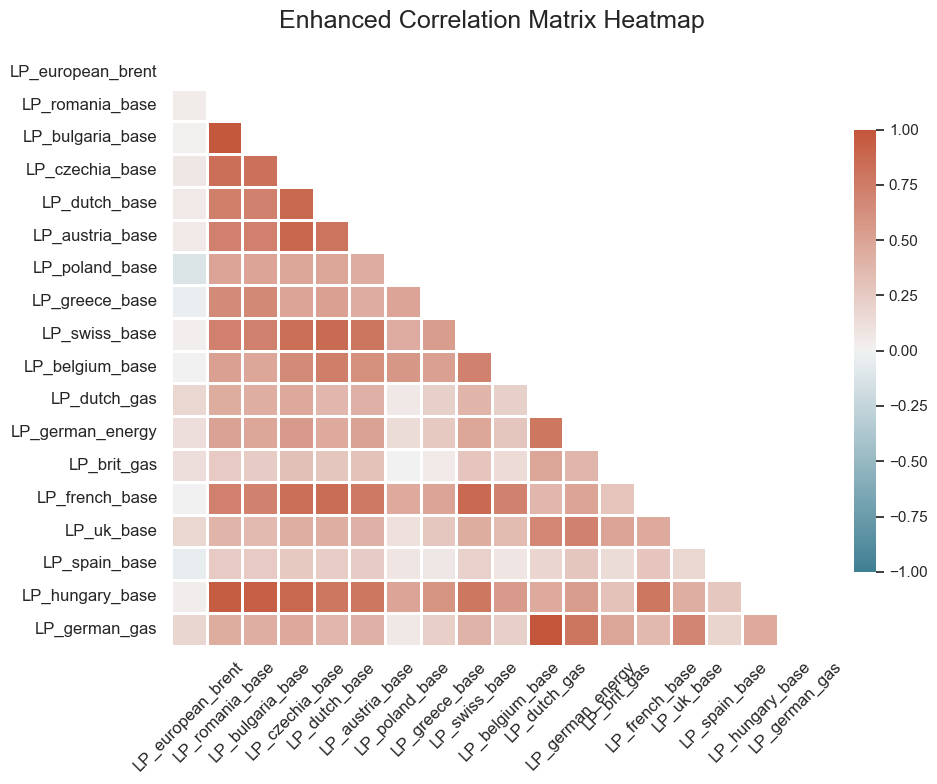

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the figure size and styling
plt.figure(figsize=(10, 8))
sns.set(style="white")  # Choose a clean, minimalistic style

# Mask the upper triangle of the heatmap for a cleaner look
mask = np.triu(np.ones_like(return_df.corr(), dtype=bool))

# Define a better color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap with customization
sns.heatmap(return_df.corr(), 
            mask=mask,                 # Apply the mask
            cmap=cmap,                 # Use the custom color palette
            annot=True,                # Show annotations
            fmt=".2f",                 # Limit annotations to 2 decimal places
            annot_kws={"size": 12},     # Increase font size for annotations
            linewidths=1,               # Thicker gridlines for clarity
            linecolor='white',          # White grid lines
            cbar_kws={"shrink": 0.75},  # Shrink the color bar to fit better
            vmin=-1, vmax=1)            # Set a fixed color range for consistency

# Add title and improve axis labels
plt.title("Enhanced Correlation Matrix Heatmap", fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=45)  # Rotate x labels for readability
plt.yticks(fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.savefig('correlation_matrix.png')

In [41]:
len(return_df.corr())

18

# Applying the Algorithms

In [3]:
from causalai.models.time_series.granger import GrangerSingle, Granger

# also importing data object, data transform object, and prior knowledge object, and the graph plotting function
from causalai.data.time_series import TimeSeriesData
from causalai.data.data_generator import DataGenerator, GenerateRandomTimeseriesSEM
from causalai.data.transforms.time_series import StandardizeTransform
from causalai.models.common.prior_knowledge import PriorKnowledge
from causalai.misc.misc import plot_graph, get_precision_recall
from causalai.models.time_series.var_lingam import VARLINGAM
from causalai.models.time_series.pc import PCSingle, PC
from causalai.models.common.CI_tests.partial_correlation import PartialCorrelation
from causalai.models.common.CI_tests.kci import KCI

In [9]:
return_df.columns

Index(['LP_european_brent', 'LP_romania_base', 'LP_bulgaria_base',
       'LP_czechia_base', 'LP_dutch_base', 'LP_austria_base', 'LP_poland_base',
       'LP_greece_base', 'LP_swiss_base', 'LP_belgium_base', 'LP_dutch_gas',
       'LP_german_energy', 'LP_brit_gas', 'LP_french_base', 'LP_uk_base',
       'LP_spain_base', 'LP_hungary_base', 'LP_german_gas'],
      dtype='object')

In [18]:

fn = lambda x:x
coef = 0.1
sem = {
        'a': [], 
        'b': [(('a', -1), coef, fn), (('f', -1), coef, fn)], 
        'c': [(('b', -2), coef, fn), (('f', -2), coef, fn)],
        'd': [(('b', -4), coef, fn), (('b', -1), coef, fn), (('g', -1), coef, fn)],
        'e': [(('f', -1), coef, fn)], 
        'f': [],
        'g': [],
        }

T = 5000

# var_names = [str(i) for i in range(6)]
# sem = GenerateRandomTimeseriesSEM(var_names=var_names, max_num_parents=2, seed=1)

data_array, var_names, graph_gt = DataGenerator(sem, T=T, seed=0)
graph_gt



{'a': [],
 'b': [('a', -1), ('f', -1)],
 'c': [('b', -2), ('f', -2)],
 'd': [('b', -4), ('b', -1), ('g', -1)],
 'e': [('f', -1)],
 'f': [],
 'g': []}

In [19]:
data_array

array([[ 0.55596268, -0.76362871, -0.67701613, ...,  0.08918265,
        -0.86717344, -1.29748746],
       [ 0.89247389,  0.38673316, -1.68993151, ...,  0.06002843,
         1.80956256, -0.14343509],
       [-0.42231482, -1.77862911,  1.19183968, ...,  0.79111026,
         1.27730447,  0.66471783],
       ...,
       [-0.53788475, -1.91819068,  0.04785447, ..., -1.46729706,
        -0.42897954, -0.48533571],
       [ 0.39344443, -0.12860734,  0.04548686, ...,  0.93394588,
         1.29701828,  1.33798183],
       [ 0.28651827,  0.39301203, -0.17884508, ...,  1.38520248,
         0.53860456, -1.67857884]])

In [20]:
return_df.dropna().values

array([[ 0.00396458, -0.01508369, -0.01515599, ...,  0.01280788,
        -0.01445619, -0.00914238],
       [ 0.01500592, -0.01818002, -0.01109224, ...,  0.02021185,
        -0.00383934,  0.05655907],
       [-0.02853067, -0.01881856, -0.02405012, ..., -0.01652717,
        -0.02549659, -0.09635121],
       ...,
       [ 0.0205232 ,  0.01255613,  0.00908628, ..., -0.01185061,
         0.01325143,  0.02363401],
       [ 0.01926073, -0.02044839, -0.02238492, ..., -0.06602059,
        -0.02381777, -0.02473751],
       [-0.00500208, -0.02204896, -0.02048722, ..., -0.01439689,
        -0.01499423,  0.01378164]])

In [21]:
list(return_df.columns)

['LP_european_brent',
 'LP_romania_base',
 'LP_bulgaria_base',
 'LP_czechia_base',
 'LP_dutch_base',
 'LP_austria_base',
 'LP_poland_base',
 'LP_greece_base',
 'LP_swiss_base',
 'LP_belgium_base',
 'LP_dutch_gas',
 'LP_german_energy',
 'LP_brit_gas',
 'LP_french_base',
 'LP_uk_base',
 'LP_spain_base',
 'LP_hungary_base',
 'LP_german_gas']

In [7]:
# 1.
StandardizeTransform_ = StandardizeTransform()
StandardizeTransform_.fit(return_df.dropna().values)

data_trans = StandardizeTransform_.transform(return_df.dropna().values)

# 2.
data_obj = TimeSeriesData(data_trans, var_names=list(return_df.columns))

In [8]:
prior_knowledge = None #  PriorKnowledge(forbidden_links={'a': ['b']})

max_lag = 4
pvalue_thres=0.1
print(f'Using max_lag {max_lag}')

granger = Granger(
        data=data_obj,
        prior_knowledge=prior_knowledge,
        max_iter=10000, # number of optimization iterations for model fitting (default value is 1000)
        use_multiprocessing=False
        ) 

Using max_lag 4


In [12]:
tic = time.time()
result = granger.run(pvalue_thres=pvalue_thres, max_lag=max_lag)
toc = time.time()
print(f'Time taken: {toc-tic:.2f}s\n')


print(f' The output causal_strength has keys: {result.keys()}')

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10312350641970625, tolerance: 0.06372735586524378
  model = cd_fast.enet_coordinate_descent_gram(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04479651316921718, tolerance: 0.04216667909547169
  model = cd_fast.enet_coordinate_descent_gram(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04759351496511499, tolerance: 0.04216667909547169
  model = cd_fast.enet_coordinate_descent_gram(
/Users/juliusgruber/anaconda3/lib/

Time taken: 17.43s

 The output causal_strength has keys: dict_keys(['LP_european_brent', 'LP_romania_base', 'LP_bulgaria_base', 'LP_czechia_base', 'LP_dutch_base', 'LP_austria_base', 'LP_poland_base', 'LP_greece_base', 'LP_swiss_base', 'LP_belgium_base', 'LP_dutch_gas', 'LP_german_energy', 'LP_brit_gas', 'LP_french_base', 'LP_uk_base', 'LP_spain_base', 'LP_hungary_base', 'LP_german_gas'])


# VarLingam
max_lag = 4
print(f'Using max_lag {max_lag}')

var_lingam = VARLINGAM(
        data=data_obj
        )
result = var_lingam.run(pvalue_thres=0.1, max_lag=max_lag)


# PCMCI 

In [9]:
prior_knowledge = None #  PriorKnowledge(forbidden_links={})

max_lag = 5
pvalue_thres = 0.05
print(f'Using max_lag {max_lag}')
#CI_test = PartialCorrelation()
CI_test = KCI(chunk_size=50) # use if the causal relationship is expected to be non-linear
pc = PC(
        data=data_obj,
        prior_knowledge=prior_knowledge,
        CI_test=CI_test,
        use_multiprocessing=False
        )

Using max_lag 5


In [10]:
result = pc.run(pvalue_thres=pvalue_thres, max_lag=max_lag)

print(f'Predicted parents:')
graph_est={n:[] for n in result.keys()}
for key in result.keys():
    parents = result[key]['parents']
    graph_est[key].extend(parents)
    print(f'{key}: {parents}')

Predicted parents:
LP_european_brent: []
LP_romania_base: []
LP_bulgaria_base: []
LP_czechia_base: []
LP_dutch_base: []
LP_austria_base: []
LP_poland_base: [('LP_poland_base', -1)]
LP_greece_base: []
LP_swiss_base: []
LP_belgium_base: []
LP_dutch_gas: []
LP_german_energy: []
LP_brit_gas: []
LP_french_base: []
LP_uk_base: []
LP_spain_base: []
LP_hungary_base: []
LP_german_gas: []


In [11]:
result = pc.run(pvalue_thres=pvalue_thres, max_lag=max_lag)

print(f'Predicted parents:')
graph_est={n:[] for n in result.keys()}
for key in result.keys():
    parents = result[key]['parents']
    graph_est[key].extend(parents)
    print(f'{key}: {parents}')

Predicted parents:
LP_european_brent: []
LP_romania_base: []
LP_bulgaria_base: []
LP_czechia_base: []
LP_dutch_base: []
LP_austria_base: []
LP_poland_base: [('LP_poland_base', -1)]
LP_greece_base: []
LP_swiss_base: []
LP_belgium_base: []
LP_dutch_gas: []
LP_german_energy: []
LP_brit_gas: []
LP_french_base: []
LP_uk_base: []
LP_spain_base: []
LP_hungary_base: []
LP_german_gas: []


In [12]:
return_df.corr()

,LP_european_brent,LP_romania_base,LP_bulgaria_base,LP_czechia_base,LP_dutch_base,LP_austria_base,LP_poland_base,LP_greece_base,LP_swiss_base,LP_belgium_base,LP_dutch_gas,LP_german_energy,LP_brit_gas,LP_french_base,LP_uk_base,LP_spain_base,LP_hungary_base,LP_german_gas
LP_european_brent,1.000000,0.041583,0.014674,0.067466,0.050223,0.050446,-0.123366,-0.037384,0.017844,0.005062,0.170506,0.121942,0.124774,0.006227,0.169024,-0.054344,0.027734,0.173880
LP_romania_base,0.041583,1.000000,0.978632,0.829141,0.732360,0.726219,0.492658,0.653833,0.720780,0.520909,0.438882,0.505065,0.257191,0.724984,0.392949,0.254242,0.947488,0.440468
LP_bulgaria_base,0.014674,0.978632,1.000000,0.819755,0.717532,0.719514,0.498240,0.670185,0.715488,0.481594,0.434797,0.479927,0.235945,0.703275,0.353559,0.251514,0.932355,0.435980
LP_czechia_base,0.067466,0.829141,0.819755,1.000000,0.882781,0.884473,0.486088,0.497134,0.842934,0.652784,0.464486,0.554728,0.316372,0.828945,0.431174,0.264385,0.876611,0.463285
LP_dutch_base,0.050223,0.732360,0.717532,0.882781,1.000000,0.802815,0.488149,0.508379,0.855978,0.734409,0.369825,0.458887,0.273745,0.845041,0.432857,0.229526,0.784413,0.368595
LP_austria_base,0.050446,0.726219,0.719514,0.884473,0.802815,1.000000,0.445404,0.448424,0.794289,0.620810,0.419944,0.505748,0.311646,0.766059,0.417072,0.235717,0.784692,0.420611
LP_poland_base,-0.123366,0.492658,0.498240,0.486088,0.488149,0.445404,1.000000,0.493945,0.451105,0.572110,0.060070,0.135592,0.000616,0.460914,0.114737,0.080943,0.499885,0.061277
LP_greece_base,-0.037384,0.653833,0.670185,0.497134,0.508379,0.448424,0.493945,1.000000,0.537243,0.512099,0.218014,0.260389,0.052949,0.498204,0.266191,0.064777,0.598800,0.220695
LP_swiss_base,0.017844,0.720780,0.715488,0.842934,0.855978,0.794289,0.451105,0.537243,1.000000,0.707815,0.397166,0.478806,0.289012,0.869039,0.441012,0.208729,0.782964,0.399039
LP_belgium_base,0.005062,0.520909,0.481594,0.652784,0.734409,0.620810,0.572110,0.512099,0.707815,1.000000,0.210957,0.273588,0.140877,0.706722,0.343862,0.073841,0.557884,0.211422


# First Analysis on small dataset
In this section, we are doing our first experiment. We are analysisng the cross border effects of German Energy, German Gas, Dutch Gas and Dutch Energy prices.

In [13]:
def output_causal_relations_pcmci(returns_df, contracts, starting_preriod, end_preiod,pval_thresh,max_lag_input):
    new_returns_df = return_df[contracts].loc[starting_preriod:end_preiod]
    prior_knowledge = None #  PriorKnowledge(forbidden_links={})


    curr_df = new_returns_df
    
    StandardizeTransform_ = StandardizeTransform()
    StandardizeTransform_.fit(curr_df.dropna().values)
    
    data_trans = StandardizeTransform_.transform(curr_df.dropna().values)
    
    # 2.
    data_obj = TimeSeriesData(curr_df, var_names=list(curr_df.columns))
    
    
    
    data_trans = StandardizeTransform_.transform(curr_df.dropna().values)
    
    
    data_obj = TimeSeriesData(data_trans, var_names=list(curr_df.columns))
    max_lag = max_lag_input
    pvalue_thres = pval_thresh
    print(f'Using max_lag {max_lag}')
    CI_test = PartialCorrelation()
    # CI_test = KCI(chunk_size=100) # use if the causal relationship is expected to be non-linear
    pc = PC(
            data=data_obj,
            prior_knowledge=prior_knowledge,
            CI_test=CI_test,
            use_multiprocessing=False
            )

    result = pc.run(pvalue_thres=pvalue_thres, max_lag=max_lag)
    
    print(f'Predicted parents:')
    graph_est={n:[] for n in result.keys()}
    for key in result.keys():
        parents = result[key]['parents']
        graph_est[key].extend(parents)
        print(f'{key}: {parents}')
    return result, graph_est

In [14]:
small_analysis_contract = ['LP_german_energy', 'LP_german_gas','LP_dutch_base','LP_dutch_gas']

In [15]:
result

{'LP_european_brent': {'parents': [],
  'value_dict': {('LP_european_brent', -1): 9.290723402296628e-20,
   ('LP_european_brent', -2): 1.0974628838425366e-19,
   ('LP_european_brent', -3): 9.685878605963579e-20,
   ('LP_european_brent', -4): 8.778032990489049e-20,
   ('LP_european_brent', -5): 1.1319585675268692e-19,
   ('LP_romania_base', -1): 7.394742559676765e-20,
   ('LP_romania_base', -2): 7.857523909636022e-20,
   ('LP_romania_base', -3): 6.607182321183819e-20,
   ('LP_romania_base', -4): 6.378166830495722e-20,
   ('LP_romania_base', -5): 7.261600649174915e-20,
   ('LP_bulgaria_base', -1): 7.225435475202292e-20,
   ('LP_bulgaria_base', -2): 8.141450815389096e-20,
   ('LP_bulgaria_base', -3): 6.605980767511268e-20,
   ('LP_bulgaria_base', -4): 6.557025297211523e-20,
   ('LP_bulgaria_base', -5): 7.496928580997242e-20,
   ('LP_czechia_base', -1): 8.371891806026053e-20,
   ('LP_czechia_base', -2): 8.095602459362968e-20,
   ('LP_czechia_base', -3): 6.238339438273303e-20,
   ('LP_czech

In [16]:
result, graph_est = output_causal_relations_pcmci(return_df, small_analysis_contract,'2021-01-01','2022-12-31',0.05,5)

Using max_lag 5
Predicted parents:
LP_german_energy: [('LP_german_energy', -3), ('LP_dutch_base', -5), ('LP_dutch_base', -1)]
LP_german_gas: [('LP_german_energy', -1), ('LP_german_gas', -3), ('LP_dutch_gas', -3), ('LP_dutch_gas', -2), ('LP_dutch_base', -5)]
LP_dutch_base: [('LP_german_gas', -2), ('LP_dutch_gas', -2)]
LP_dutch_gas: [('LP_german_energy', -1), ('LP_german_gas', -3), ('LP_dutch_gas', -2), ('LP_dutch_gas', -3), ('LP_german_gas', -2), ('LP_dutch_base', -5)]


In [17]:
graph_est

{'LP_german_energy': [('LP_german_energy', -3),
  ('LP_dutch_base', -5),
  ('LP_dutch_base', -1)],
 'LP_german_gas': [('LP_german_energy', -1),
  ('LP_german_gas', -3),
  ('LP_dutch_gas', -3),
  ('LP_dutch_gas', -2),
  ('LP_dutch_base', -5)],
 'LP_dutch_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)],
 'LP_dutch_gas': [('LP_german_energy', -1),
  ('LP_german_gas', -3),
  ('LP_dutch_gas', -2),
  ('LP_dutch_gas', -3),
  ('LP_german_gas', -2),
  ('LP_dutch_base', -5)]}

The above code presents up with some clear correlation pairs that are statistically significant patterns. We would like to validate the assumption that these are indeed predictive. We are going to do this by looking at a simple backtest to see wheter those patterns are indeed predictive.

# Validating the correlations

In [18]:
import pandas as pd

# Function to check correlations for the given dictionary and dataframe
def check_lag_correlations(return_df, relations):
    correlations = {}
    
    for key, influences in relations.items():
        correlations[key] = {}
        for influencer, lag in influences:
            if influencer in return_df.columns and key in return_df.columns:
                # Shift the influencer's data by the specified lag
                shifted_series = return_df[influencer].shift(-lag)
                # Calculate the correlation
                correlation = return_df[key].corr(shifted_series)
                # Store the correlation
                correlations[key][f"{influencer}_lag{lag}"] = correlation
            else:
                correlations[key][f"{influencer}_lag{lag}"] = None  # Missing data warning
    
    return correlations

# Example usage
relations = {
    'LP_german_energy': [('LP_german_energy', -3),
                         ('LP_dutch_base', -5),
                         ('LP_dutch_base', -1)],
    'LP_german_gas': [('LP_german_energy', -1),
                      ('LP_german_gas', -3),
                      ('LP_dutch_gas', -3),
                      ('LP_dutch_gas', -2),
                      ('LP_dutch_base', -5)],
    'LP_dutch_base': [('LP_german_gas', -2), 
                      ('LP_dutch_gas', -2)],
    'LP_dutch_gas': [('LP_german_energy', -1),
                     ('LP_german_gas', -3),
                     ('LP_dutch_gas', -2),
                     ('LP_dutch_gas', -3),
                     ('LP_german_gas', -2),
                     ('LP_dutch_base', -5)]
}

# Assuming returns_df is your dataframe
correlation_results = check_lag_correlations(return_df, relations)

# Print the results
for key, correlation_dict in correlation_results.items():
    print(f"Correlations for {key}:")
    for lagged_influencer, corr_value in correlation_dict.items():
        print(f"  {lagged_influencer}: {corr_value}")


Correlations for LP_german_energy:
  LP_german_energy_lag-3: 0.03588555569435305
  LP_dutch_base_lag-5: -0.08080687986555062
  LP_dutch_base_lag-1: 0.13888731467209606
Correlations for LP_german_gas:
  LP_german_energy_lag-1: 0.13537753210020856
  LP_german_gas_lag-3: 0.04009513785844341
  LP_dutch_gas_lag-3: 0.032088598515902726
  LP_dutch_gas_lag-2: -0.08770166374406049
  LP_dutch_base_lag-5: -0.07662082581032449
Correlations for LP_dutch_base:
  LP_german_gas_lag-2: 0.14002666052309753
  LP_dutch_gas_lag-2: 0.12888438756677398
Correlations for LP_dutch_gas:
  LP_german_energy_lag-1: 0.12675851951546865
  LP_german_gas_lag-3: 0.04195847731883365
  LP_dutch_gas_lag-2: -0.08687718890181664
  LP_dutch_gas_lag-3: 0.03395678410993749
  LP_german_gas_lag-2: -0.0836038229569366
  LP_dutch_base_lag-5: -0.07518309815441443


We can indeed see corelations in the dataset.

# Signals Analysis

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def get_predictions_vs_actuals(returns_df, relations, train_start, train_end, test_start, test_end, clipping=False):
    """
    Get predictions from a linear regression model versus actuals.

    Parameters:
    - returns_df: DataFrame containing the returns.
    - relations: Dictionary of signals and their lags.
    - train_start: Start date of the training period.
    - train_end: End date of the training period.
    - test_start: Start date of the testing/backtesting period.
    - test_end: End date of the testing/backtesting period.
    - clipping: Boolean to apply winsorization (1st and 99th percentiles) to regression inputs.

    Returns:
    - results_df: DataFrame with predictions and actuals for each target.
    """
    # Ensure the DataFrame index is a DatetimeIndex
    if not isinstance(returns_df.index, pd.DatetimeIndex):
        returns_df = returns_df.copy()
        returns_df.index = pd.to_datetime(returns_df.index)
    
    # Prepare the lagged signals
    lagged_signals = pd.DataFrame(index=returns_df.index)
    
    for key, influences in relations.items():
        for influencer, lag in influences:
            if influencer in returns_df.columns:
                # Add the lagged signal
                lagged_signals[f"{influencer}_lag{lag}"] = returns_df[influencer].shift(-lag)
    
    # Combine the lagged signals with the target (key columns from relations)
    data = returns_df.copy()
    data = data.join(lagged_signals)
    
    # Split into training and testing sets
    train_data = data[train_start:train_end]
    test_data = data[test_start:test_end]
    
    # Prepare training inputs and outputs
    X_train = train_data[lagged_signals.columns].dropna()
    y_train = train_data.loc[X_train.index, relations.keys()]
    
    # Apply winsorization if clipping is True
    if clipping:
        lower_bound = X_train.quantile(0.01)
        upper_bound = X_train.quantile(0.99)
        X_train = X_train.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Prepare test inputs and actuals
    X_test = test_data[lagged_signals.columns].dropna()
    y_test = test_data.loc[X_test.index, relations.keys()]
    
    # Apply winsorization to test data if clipping is True
    if clipping:
        lower_bound = X_test.quantile(0.01)
        upper_bound = X_test.quantile(0.99)
        X_test = X_test.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Create a results DataFrame
    results_df = pd.DataFrame(predictions, columns=[f"Predicted_{col}" for col in y_test.columns], index=X_test.index)
    for col in y_test.columns:
        results_df[f"Actual_{col}"] = y_test[col].values
    
    return results_df

# Example usage
relations = {
    'LP_german_energy': [('LP_german_energy', -3), ('LP_dutch_base', -5), ('LP_dutch_base', -1)],
    'LP_german_gas': [('LP_german_energy', -1), ('LP_german_gas', -3), ('LP_dutch_gas', -3), ('LP_dutch_gas', -2), ('LP_dutch_base', -5)],
    'LP_dutch_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)],
    'LP_dutch_gas': [('LP_german_energy', -1), ('LP_german_gas', -3), ('LP_dutch_gas', -2), ('LP_dutch_gas', -3), ('LP_german_gas', -2), ('LP_dutch_base', -5)]
}

# Assuming returns_df is your DataFrame with signals and returns
train_start = '2021-07-01'
train_end = '2023-12-31'
test_start = '2024-01-01'
test_end = '2024-09-13'

# Apply clipping during regression
predictions_vs_actuals = get_predictions_vs_actuals(
    return_df.dropna(), relations, train_start, train_end, test_start, test_end, clipping=True
)

In [20]:
predictions_vs_actuals

,Predicted_LP_german_energy,Predicted_LP_german_gas,Predicted_LP_dutch_base,Predicted_LP_dutch_gas,Actual_LP_german_energy,Actual_LP_german_gas,Actual_LP_dutch_base,Actual_LP_dutch_gas
Date,,,,,,,,
2024-01-02,-0.017405,-0.000046,-0.003553,-0.000122,-0.068348,-0.136774,0.255931,-0.140664
2024-01-03,0.049078,0.001046,0.001311,0.001227,0.077744,0.067827,0.038640,0.070391
2024-01-04,0.008924,0.030846,0.007552,0.030433,0.017617,0.023024,0.013717,0.027454
2024-01-05,0.001688,-0.001963,0.006398,-0.002297,-0.002971,0.031719,-0.017017,0.030351
2024-01-08,-0.000397,-0.001916,0.001631,-0.001713,-0.110346,-0.087995,-0.074356,-0.090652
2024-01-09,-0.025380,-0.040389,-0.017031,-0.039487,-0.019979,-0.027224,-0.064443,-0.027407
2024-01-10,-0.013803,-0.000820,-0.011161,-0.000447,-0.008956,0.008559,-0.012524,0.010318
2024-01-11,-0.001091,0.001878,-0.006495,0.001758,-0.028419,-0.003433,-0.014634,-0.003878
2024-01-12,0.001893,-0.002978,-0.005905,-0.002773,0.010770,0.000000,0.001980,0.038545


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def plot_predicted_vs_actual(df, columns_to_compare, save_path='plots/random.png'):
    """
    Plots predicted vs actual values with a scatter plot and a linear regression line.

    Parameters:
    - df1: DataFrame containing the first dataset.
    - df2: DataFrame containing the second dataset.
    - columns_to_compare: List of two column names to compare (e.g., ['Predicted', 'Actual']).

    Returns:
    - None. Displays the plot.
    """
    col2, col1  = columns_to_compare
    
    # Extract columns to compare
    x = df[col1].values
    y = df[col2].values
    
    # Ensure matching lengths
    min_len = min(len(x), len(y))
    x = x[:min_len]
    y = y[:min_len]
    
    # Linear regression
    x_reshaped = x.reshape(-1, 1)  # Reshape for sklearn
    reg = LinearRegression()
    reg.fit(x_reshaped, y)
    y_pred = reg.predict(x_reshaped)
    r2 = reg.score(x_reshaped, y)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, label="Data Points")
    plt.plot(x, y_pred, color="red", linewidth=2, label=f"Linear Fit: y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}\nR² = {r2:.2f}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Predicted vs Actual")
    plt.legend()
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

# Example usage (replace df1, df2, and column names with actual data)
# plot_predicted_vs_actual(df1, df2, ['Predicted', 'Actual'])


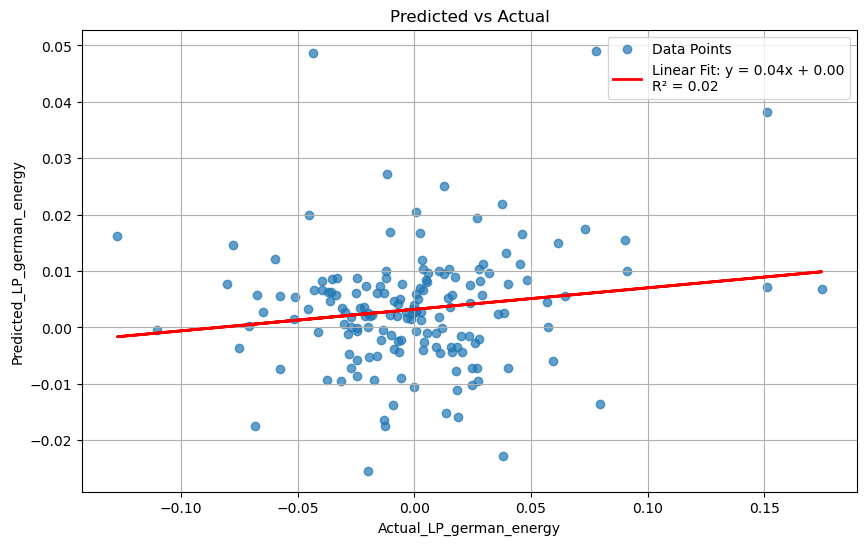

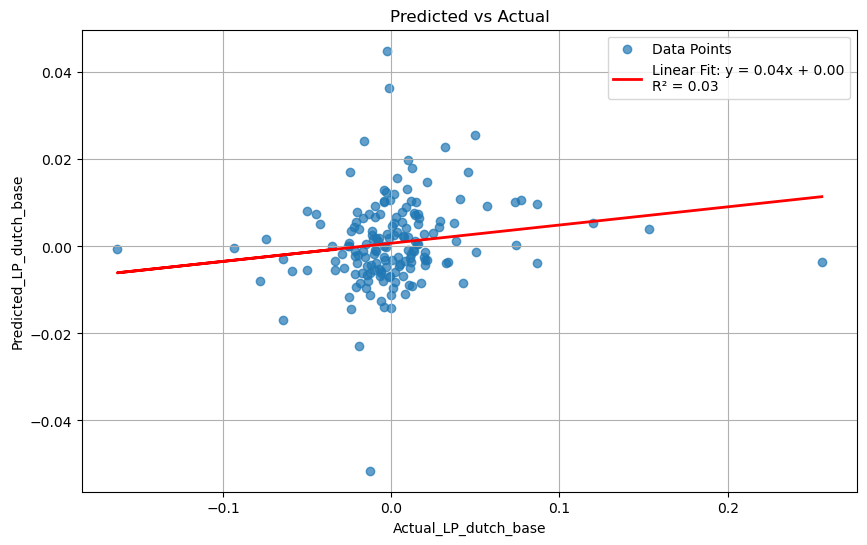

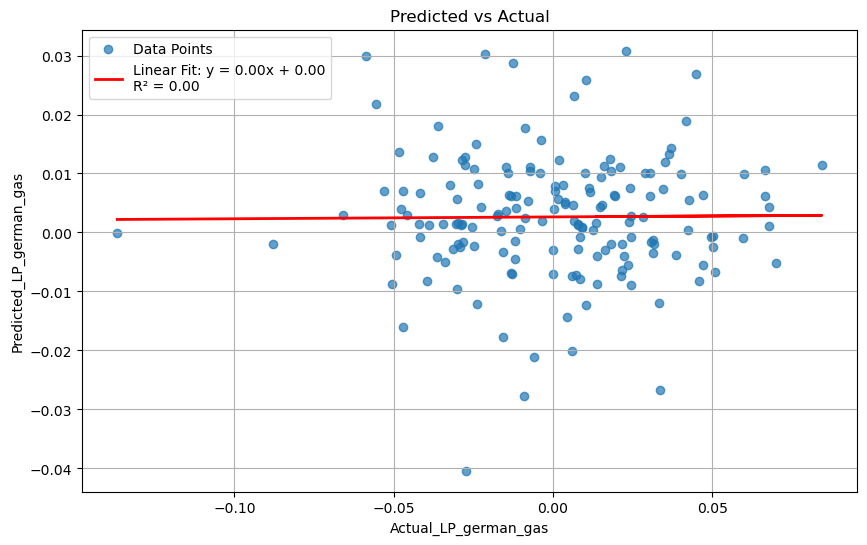

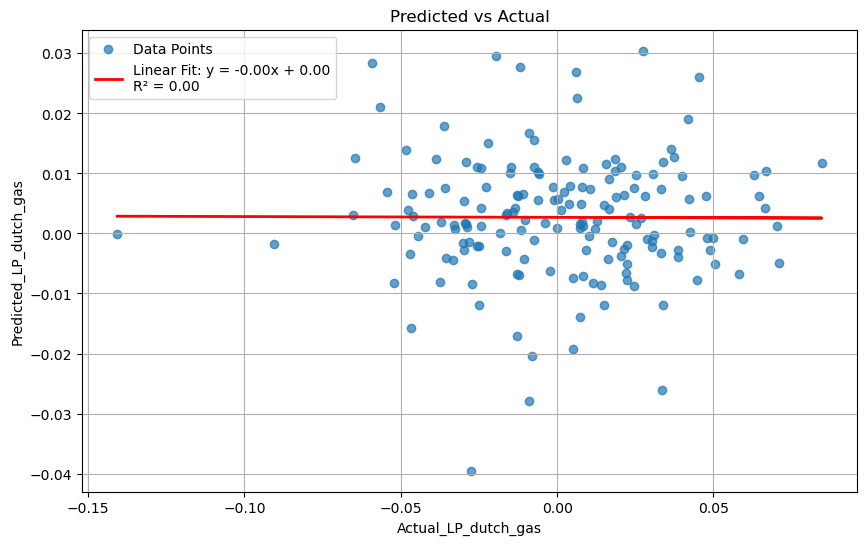

In [22]:
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_german_energy', 'Actual_LP_german_energy'],'plots/small_german_energy.png')
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_dutch_base', 'Actual_LP_dutch_base'],'plots/small_dutch_energy.png')
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_german_gas', 'Actual_LP_german_gas'],'plots/small_german_gas.png')
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_dutch_gas', 'Actual_LP_dutch_gas'],'plots/small_dutch_gas.png')

In [27]:
np.sum(predictions_vs_actuals[['Predicted_LP_german_energy']].values*predictions_vs_actuals[['Actual_LP_german_energy']].values > 0)/len(predictions_vs_actuals)

0.48484848484848486

In [32]:
np.sum(predictions_vs_actuals[['Predicted_LP_dutch_base']].values*predictions_vs_actuals[['Actual_LP_dutch_base']].values > 0)/len(predictions_vs_actuals)

0.593939393939394

In [29]:
np.sum(predictions_vs_actuals[['Predicted_LP_german_gas']].values*predictions_vs_actuals[['Actual_LP_german_gas']].values > 0)/len(predictions_vs_actuals)

0.47878787878787876

In [30]:
np.sum(predictions_vs_actuals[['Predicted_LP_dutch_gas']].values*predictions_vs_actuals[['Actual_LP_dutch_gas']].values > 0)/len(predictions_vs_actuals)

0.4666666666666667

In [ ]:
predictions_vs_actuals[['Predicted_LP_dutch_gas']]predictions_vs_actuals[['Actual_LP_dutch_gas']

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [39]:
print(mean_squared_error(predictions_vs_actuals[['Predicted_LP_dutch_gas']],predictions_vs_actuals[['Actual_LP_dutch_gas']]))
print(mean_absolute_error(predictions_vs_actuals[['Predicted_LP_dutch_gas']],predictions_vs_actuals[['Actual_LP_dutch_gas']]))

0.0012801693141107876
0.028771914274003225


In [70]:
predictions_vs_actuals

,Predicted_LP_german_energy,Predicted_LP_german_gas,Predicted_LP_dutch_base,Predicted_LP_dutch_gas,Predicted_LP_poland_base,Predicted_LP_austria_base,Predicted_LP_czechia_base,Predicted_LP_french_base,Actual_LP_german_energy,Actual_LP_german_gas,Actual_LP_dutch_base,Actual_LP_dutch_gas,Actual_LP_poland_base,Actual_LP_austria_base,Actual_LP_czechia_base,Actual_LP_french_base
Date,,,,,,,,,,,,,,,,
2024-01-02,-0.020862,-0.003161,-0.004768,-0.003316,-0.002992,-0.005853,-0.009396,-0.014077,-0.068348,-0.136774,0.255931,-0.140664,0.257634,0.238957,0.300868,0.308985
2024-01-03,0.047652,-0.000158,0.001041,-0.000050,0.003362,0.017789,0.022594,0.024001,0.077744,0.067827,0.038640,0.070391,-0.005078,0.056916,0.053373,0.073661
2024-01-04,0.023127,0.043383,0.012188,0.043321,-0.000849,0.009566,0.006639,0.015491,0.017617,0.023024,0.013717,0.027454,-0.001206,0.004166,-0.008043,-0.009459
2024-01-05,0.001385,-0.002629,0.006041,-0.002874,0.001227,0.002113,0.004072,0.005717,-0.002971,0.031719,-0.017017,0.030351,-0.005017,-0.005160,-0.013682,-0.015322
2024-01-08,-0.006648,-0.008008,-0.001053,-0.007817,0.000490,0.001628,-0.002036,-0.005060,-0.110346,-0.087995,-0.074356,-0.090652,0.001961,-0.050753,-0.104192,-0.091655
2024-01-09,-0.011089,-0.026388,-0.010530,-0.025539,0.002319,-0.009589,-0.009285,-0.011036,-0.019979,-0.027224,-0.064443,-0.027407,0.001491,-0.045859,-0.047832,-0.079197
2024-01-10,-0.013323,0.000176,-0.010497,0.000398,-0.002071,-0.010461,-0.012385,-0.014255,-0.008956,0.008559,-0.012524,0.010318,-0.000372,-0.000898,-0.007228,-0.003058
2024-01-11,-0.002706,0.000654,-0.006796,0.000431,-0.002883,-0.006729,-0.004408,-0.005247,-0.028419,-0.003433,-0.014634,-0.003878,-0.000652,-0.051815,-0.016503,-0.005879
2024-01-12,-0.001023,-0.005837,-0.007104,-0.005640,-0.000747,-0.005366,-0.004265,-0.005205,0.010770,0.000000,0.001980,0.038545,-0.006800,0.008535,0.010117,0.015171


# Results with more variables

In [24]:
big_analysis_contract = ['LP_german_energy', 'LP_german_gas','LP_dutch_base','LP_dutch_gas','LP_poland_base', 'LP_austria_base', 'LP_czechia_base','LP_french_base']

In [25]:
result, graph_est = output_causal_relations_pcmci(return_df, big_analysis_contract,'2021-01-01','2022-12-31',0.05,5)

Using max_lag 5
Predicted parents:
LP_german_energy: [('LP_german_energy', -3)]
LP_german_gas: [('LP_german_energy', -1), ('LP_dutch_base', -2)]
LP_dutch_base: [('LP_dutch_base', -1), ('LP_german_gas', -2), ('LP_dutch_gas', -2)]
LP_dutch_gas: [('LP_german_energy', -1), ('LP_german_gas', -3), ('LP_dutch_gas', -2), ('LP_dutch_gas', -3), ('LP_dutch_base', -2), ('LP_german_gas', -2)]
LP_poland_base: [('LP_german_gas', -2), ('LP_dutch_gas', -2)]
LP_austria_base: [('LP_german_gas', -2), ('LP_dutch_gas', -2)]
LP_czechia_base: [('LP_german_gas', -2), ('LP_dutch_gas', -2)]
LP_french_base: [('LP_german_gas', -2), ('LP_dutch_gas', -2)]


In [46]:
graph_est

{'LP_german_energy': [('LP_german_energy', -3)],
 'LP_german_gas': [('LP_german_energy', -1), ('LP_dutch_base', -2)],
 'LP_dutch_base': [('LP_dutch_base', -1),
  ('LP_german_gas', -2),
  ('LP_dutch_gas', -2)],
 'LP_dutch_gas': [('LP_german_energy', -1),
  ('LP_german_gas', -3),
  ('LP_dutch_gas', -2),
  ('LP_dutch_gas', -3),
  ('LP_dutch_base', -2),
  ('LP_german_gas', -2)],
 'LP_poland_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)],
 'LP_austria_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)],
 'LP_czechia_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)],
 'LP_french_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)]}

In [80]:
relations

{'LP_german_energy': [('LP_german_energy', -3),
  ('LP_dutch_base', -5),
  ('LP_dutch_base', -1)],
 'LP_german_gas': [('LP_german_energy', -1),
  ('LP_german_gas', -3),
  ('LP_dutch_gas', -3),
  ('LP_dutch_gas', -2),
  ('LP_dutch_base', -5)],
 'LP_dutch_base': [('LP_german_gas', -2), ('LP_dutch_gas', -2)],
 'LP_dutch_gas': [('LP_german_energy', -1),
  ('LP_german_gas', -3),
  ('LP_dutch_gas', -2),
  ('LP_dutch_gas', -3),
  ('LP_german_gas', -2),
  ('LP_dutch_base', -5)]}

In [40]:
# Assuming returns_df is your DataFrame with signals and returns
train_start = '2021-07-01'
train_end = '2023-12-31'
test_start = '2024-01-01'
test_end = '2024-09-13'

# Apply clipping during regression
predictions_vs_actuals = get_predictions_vs_actuals(
    return_df.dropna(), graph_est, train_start, train_end, test_start, test_end, clipping=True
)

In [41]:
predictions_vs_actuals.columns

Index(['Predicted_LP_german_energy', 'Predicted_LP_german_gas',
       'Predicted_LP_dutch_base', 'Predicted_LP_dutch_gas',
       'Predicted_LP_poland_base', 'Predicted_LP_austria_base',
       'Predicted_LP_czechia_base', 'Predicted_LP_french_base',
       'Actual_LP_german_energy', 'Actual_LP_german_gas',
       'Actual_LP_dutch_base', 'Actual_LP_dutch_gas', 'Actual_LP_poland_base',
       'Actual_LP_austria_base', 'Actual_LP_czechia_base',
       'Actual_LP_french_base'],
      dtype='object')

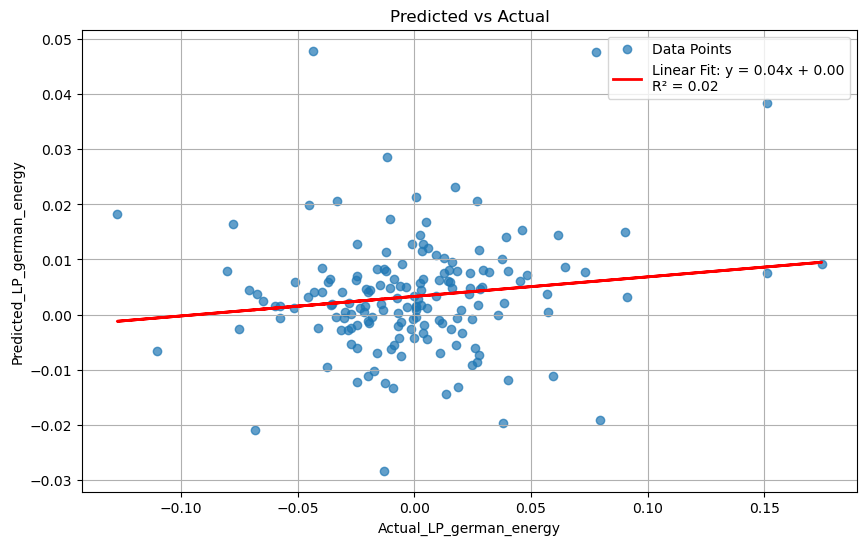

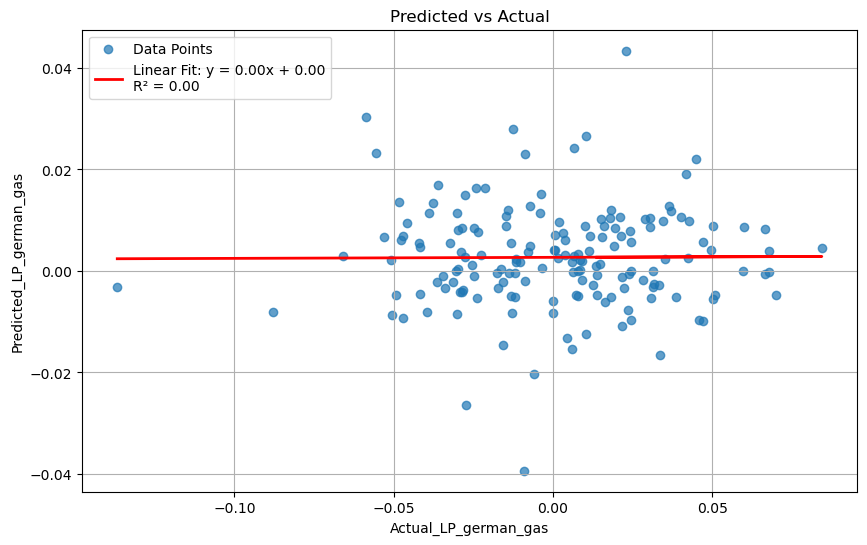

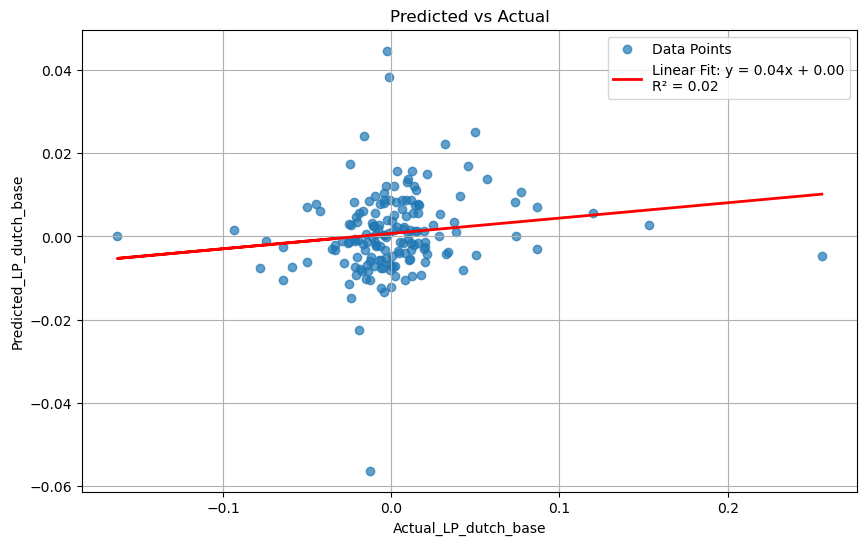

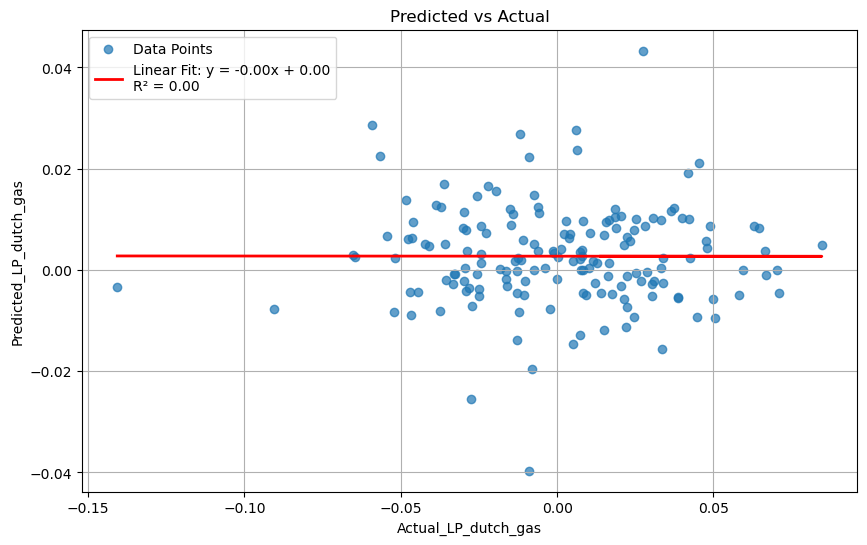

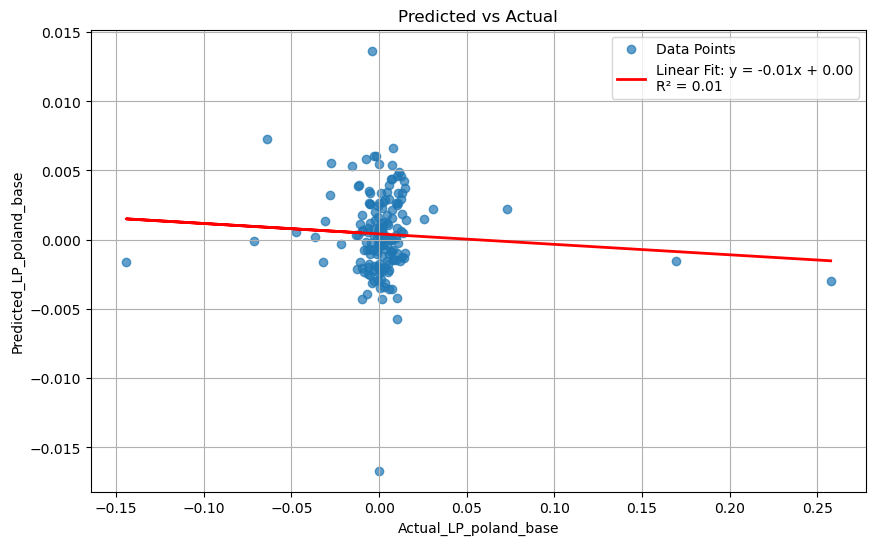

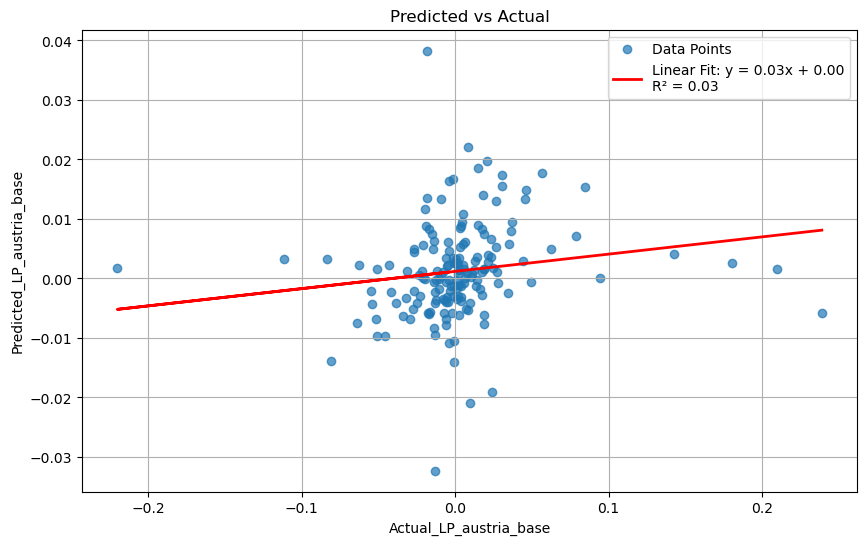

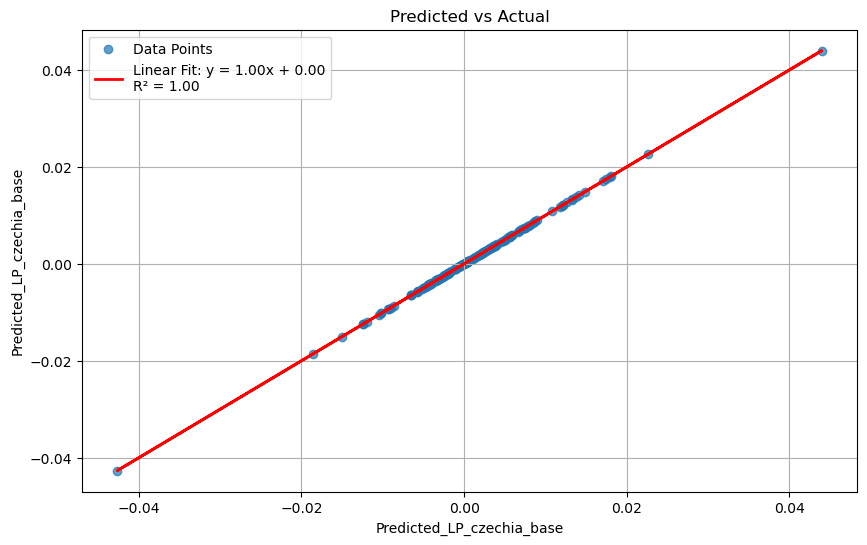

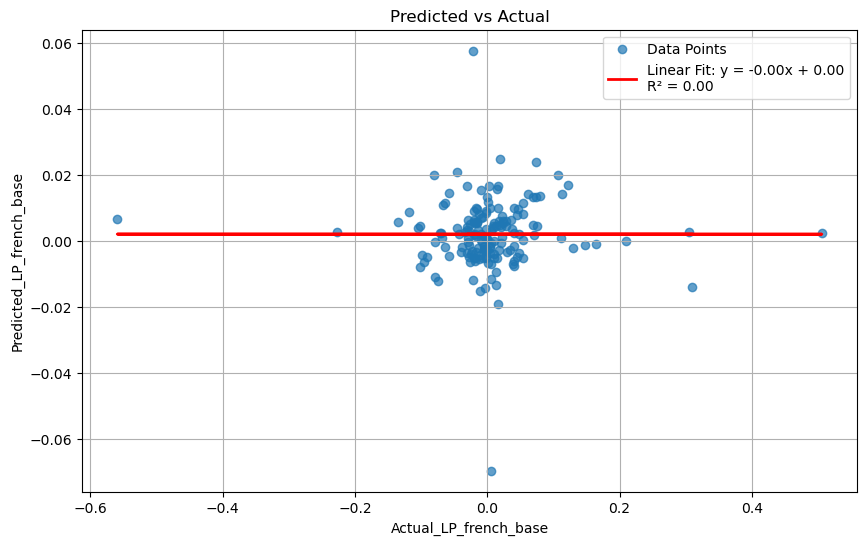

In [42]:
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_german_energy', 'Actual_LP_german_energy'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_german_gas', 'Actual_LP_german_gas'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_dutch_base', 'Actual_LP_dutch_base'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_dutch_gas', 'Actual_LP_dutch_gas'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_poland_base', 'Actual_LP_poland_base'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_austria_base', 'Actual_LP_austria_base'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_czechia_base', 'Predicted_LP_czechia_base'])
plot_predicted_vs_actual(predictions_vs_actuals, ['Predicted_LP_french_base', 'Actual_LP_french_base'])

In [51]:
np.sum(predictions_vs_actuals[['Predicted_LP_german_energy']].values*predictions_vs_actuals[['Actual_LP_german_energy']].values > 0)/len(predictions_vs_actuals)

0.5333333333333333

In [52]:
np.sum(predictions_vs_actuals[['Predicted_LP_german_gas']].values*predictions_vs_actuals[['Actual_LP_german_gas']].values > 0)/len(predictions_vs_actuals)

0.509090909090909

In [53]:
np.sum(predictions_vs_actuals[['Predicted_LP_dutch_base']].values*predictions_vs_actuals[['Actual_LP_dutch_base']].values > 0)/len(predictions_vs_actuals)

0.6060606060606061

In [54]:
np.sum(predictions_vs_actuals[['Predicted_LP_dutch_gas']].values*predictions_vs_actuals[['Actual_LP_dutch_gas']].values > 0)/len(predictions_vs_actuals)

0.503030303030303

In [55]:
np.sum(predictions_vs_actuals[['Predicted_LP_poland_base']].values*predictions_vs_actuals[['Actual_LP_poland_base']].values > 0)/len(predictions_vs_actuals)

0.4909090909090909

In [56]:
np.sum(predictions_vs_actuals[['Predicted_LP_austria_base']].values*predictions_vs_actuals[['Actual_LP_austria_base']].values > 0)/len(predictions_vs_actuals)

0.6424242424242425

In [58]:
np.sum(predictions_vs_actuals[['Predicted_LP_czechia_base']].values*predictions_vs_actuals[['Actual_LP_czechia_base']].values > 0)/len(predictions_vs_actuals)

0.5393939393939394

In [59]:
np.sum(predictions_vs_actuals[['Predicted_LP_french_base']].values*predictions_vs_actuals[['Actual_LP_french_base']].values > 0)/len(predictions_vs_actuals)

0.503030303030303

In [57]:
predictions_vs_actuals = predictions_vs_actuals[1:]

In [58]:
predictions_vs_actuals =  predictions_vs_actuals[predictions_vs_actuals.index!='2024-04-02']

In [55]:
import pandas as pd
import numpy as np

def financial_backtest_with_aggregate(df):
    """
    Perform a simple financial backtest for each pair of predicted and actual returns in the DataFrame.
    Strategy:
    - If predicted return > 0, go long (position = +1)
    - If predicted return < 0, go short (position = -1)
    Daily P&L = position * actual_return
    Cumulative_Return = (1 + Daily_PnL).cumprod()

    At the end, aggregate the daily P&L from all contracts to get an overall portfolio P&L.
    """

    # Ensure 'Date' is the index if present
    if 'Date' in df.columns:
        df = df.set_index('Date')

    # Identify predicted columns
    predicted_cols = [col for col in df.columns if col.startswith('Predicted_')]

    results = {}
    daily_pnl_list = []

    for p_col in predicted_cols:
        # Find the corresponding actual column
        a_col = p_col.replace('Predicted_', 'Actual_')
        if a_col not in df.columns:
            continue

        predicted_values = df[p_col]
        actual_values = df[a_col]

        # Determine positions
        position = np.where(predicted_values > 0, 1, -1)

        # Daily PnL
        daily_pnl = position * actual_values.values

        # Create a DataFrame for this contract
        contract_name = p_col.replace('Predicted_', '')
        contract_df = pd.DataFrame({
            'Predicted': predicted_values,
            'Actual': actual_values,
            'Position': position,
            'Daily_PnL': daily_pnl,
        }, index=df.index)

        # Cumulative return for this contract
        contract_df['Cumulative_Return'] = (1 + contract_df['Daily_PnL']).cumprod()

        # Store result
        results[contract_name] = contract_df
        # Save daily PnL series to list for aggregation
        daily_pnl_list.append(contract_df['Daily_PnL'])

    # Aggregate Daily PnL across all contracts
    if daily_pnl_list:
        # Combine all contracts' PnL into one DataFrame and sum across columns
        aggregate_pnl = pd.concat(daily_pnl_list, axis=1).sum(axis=1)
        aggregate_cumulative = (1 + aggregate_pnl).cumprod()

        # Create an aggregate result DataFrame
        aggregate_results = pd.DataFrame({
            'Aggregate_Daily_PnL': aggregate_pnl,
            'Aggregate_Cumulative_Return': aggregate_cumulative
        })
    else:
        aggregate_results = pd.DataFrame()

    return results, aggregate_results

# Usage example:
results, aggregate_results = financial_backtest_with_aggregate(predictions_vs_actuals)
# print(aggregate_results.head())


In [65]:
import pandas as pd
import numpy as np

def financial_backtest_with_aggregate(df, trading_cost=0.000000):
    """
    Perform a simple financial backtest for each pair of predicted and actual returns in the DataFrame.
    Strategy:
    - If predicted return > 0, go long (position = +1)
    - If predicted return < 0, go short (position = -1)
    Daily PnL = (position * actual_return) - trading_cost
    Cumulative_Return = (1 + Daily_PnL).cumprod()

    At the end, aggregate the daily P&L from all contracts to get an overall portfolio P&L.

    trading_cost: fixed daily cost per contract.
    """

    # Ensure 'Date' is the index if present
    if 'Date' in df.columns:
        df = df.set_index('Date')

    # Identify predicted columns
    predicted_cols = [col for col in df.columns if col.startswith('Predicted_')]

    results = {}
    daily_pnl_list = []

    for p_col in predicted_cols:
        # Find the corresponding actual column
        a_col = p_col.replace('Predicted_', 'Actual_')
        if a_col not in df.columns:
            continue

        predicted_values = df[p_col]
        actual_values = df[a_col]

        # Determine positions
        position = np.where(predicted_values > 0, 1, -1)

        # Daily PnL = position * actual_return - trading_cost
        # Apply the trading cost to each day regardless of position
        daily_pnl = (position * actual_values.values) - trading_cost

        # Create a DataFrame for this contract
        contract_name = p_col.replace('Predicted_', '')
        contract_df = pd.DataFrame({
            'Predicted': predicted_values,
            'Actual': actual_values,
            'Position': position,
            'Daily_PnL': daily_pnl,
        }, index=df.index)

        # Cumulative return for this contract
        contract_df['Cumulative_Return'] = (1 + contract_df['Daily_PnL']).cumprod()

        # Store result
        results[contract_name] = contract_df
        # Save daily PnL series for aggregation
        daily_pnl_list.append(contract_df['Daily_PnL'])

    # Aggregate Daily PnL across all contracts
    if daily_pnl_list:
        # Combine all contracts' PnL into one DataFrame and sum across columns
        aggregate_pnl = pd.concat(daily_pnl_list, axis=1).sum(axis=1)
        aggregate_cumulative = (1 + aggregate_pnl).cumprod()

        # Create an aggregate result DataFrame
        aggregate_results = pd.DataFrame({
            'Aggregate_Daily_PnL': aggregate_pnl,
            'Aggregate_Cumulative_Return': aggregate_cumulative
        })
    else:
        aggregate_results = pd.DataFrame()

    return results, aggregate_results

# Example usage:
results, aggregate_results = financial_backtest_with_aggregate(predictions_vs_actuals, trading_cost=0.0000)
# print(aggregate_results.head())


In [77]:
import pandas as pd
import numpy as np

def financial_backtest_with_normalized_weights(df, trading_cost=0.00001):
    """
    Perform a financial backtest with normalized weights for long and short positions per day.
    Strategy:
    - Normalize long and short positions daily across all contracts so that their absolute sum equals 1.
    - Daily PnL = (normalized_position * actual_return) - trading_cost
    - Cumulative_Return = (1 + Daily_PnL).cumprod()

    trading_cost: fixed daily cost per contract.
    """

    # Ensure 'Date' is the index if present
    if 'Date' in df.columns:
        df = df.set_index('Date')

    # Identify predicted columns
    predicted_cols = [col for col in df.columns if col.startswith('Predicted_')]

    results = {}
    daily_pnl_list = []

    # Prepare a DataFrame to store normalized positions for all contracts
    normalized_positions = pd.DataFrame(index=df.index)

    # Calculate raw positions for all contracts
    for p_col in predicted_cols:
        # Find the corresponding actual column
        a_col = p_col.replace('Predicted_', 'Actual_')
        if a_col not in df.columns:
            continue

        # Determine raw positions: +1 for long, -1 for short
        predicted_values = df[p_col]
        raw_position = np.where(predicted_values > 0, 1, -1)
        normalized_positions[p_col] = raw_position

    # Normalize positions daily across all contracts
    abs_sum_per_day = normalized_positions.abs().sum(axis=1)
    normalized_positions = normalized_positions.div(abs_sum_per_day, axis=0).fillna(0)

    # Backtest logic with normalized positions
    for p_col in predicted_cols:
        # Find the corresponding actual column
        a_col = p_col.replace('Predicted_', 'Actual_')
        if a_col not in df.columns:
            continue

        predicted_values = df[p_col]
        actual_values = df[a_col]

        # Use normalized positions
        position = normalized_positions[p_col]

        # Daily PnL = normalized_position * actual_return - trading_cost
        daily_pnl = (position * actual_values.values) - trading_cost

        # Create a DataFrame for this contract
        contract_name = p_col.replace('Predicted_', '')
        contract_df = pd.DataFrame({
            'Predicted': predicted_values,
            'Actual': actual_values,
            'Normalized_Position': position,
            'Daily_PnL': daily_pnl,
        }, index=df.index)

        # Cumulative return for this contract
        contract_df['Cumulative_Return'] = (1 + contract_df['Daily_PnL']).cumprod()

        # Store result
        results[contract_name] = contract_df
        # Save daily PnL series for aggregation
        daily_pnl_list.append(contract_df['Daily_PnL'])

    # Aggregate Daily PnL across all contracts
    if daily_pnl_list:
        # Combine all contracts' PnL into one DataFrame and sum across columns
        aggregate_pnl = pd.concat(daily_pnl_list, axis=1).sum(axis=1)
        aggregate_cumulative = (1 + aggregate_pnl).cumprod()

        # Create an aggregate result DataFrame
        aggregate_results = pd.DataFrame({
            'Aggregate_Daily_PnL': aggregate_pnl,
            'Aggregate_Cumulative_Return': aggregate_cumulative
        })
    else:
        aggregate_results = pd.DataFrame()

    return results, aggregate_results

# Example usage:
results, aggregate_results = financial_backtest_with_normalized_weights(predictions_vs_actuals, trading_cost=0.0001)
# print(aggregate_results.head())


In [79]:
import pandas as pd
import numpy as np

def financial_backtest_with_market_neutral_positions(df, trading_cost=0.000000):
    """
    Perform a financial backtest with market-neutral positions (longs and shorts sum to 0 daily).
    Strategy:
    - Normalize long and short positions daily so that their sum equals 0 across all contracts.
    - Daily PnL = (position * actual_return) - trading_cost
    - Cumulative_Return = (1 + Daily_PnL).cumprod()

    trading_cost: fixed daily cost per contract.
    """

    # Ensure 'Date' is the index if present
    if 'Date' in df.columns:
        df = df.set_index('Date')

    # Identify predicted columns
    predicted_cols = [col for col in df.columns if col.startswith('Predicted_')]

    results = {}
    daily_pnl_list = []

    # Initialize a DataFrame for storing positions and PnL for all contracts
    all_positions = pd.DataFrame(index=df.index)
    all_daily_pnl = pd.DataFrame(index=df.index)

    for p_col in predicted_cols:
        # Find the corresponding actual column
        a_col = p_col.replace('Predicted_', 'Actual_')
        if a_col not in df.columns:
            continue

        predicted_values = df[p_col]
        actual_values = df[a_col]

        # Determine raw positions: +1 for long, -1 for short
        raw_position = np.where(predicted_values > 0, 1, -1)

        # Add the raw positions to the all_positions DataFrame
        all_positions[p_col] = raw_position

    # Normalize positions per day to ensure they sum to 0 (market-neutral)
    for date in df.index:
        daily_positions = all_positions.loc[date]

        # Separate long and short positions
        long_positions = daily_positions[daily_positions > 0]
        short_positions = daily_positions[daily_positions < 0]

        # Scale long positions to sum to +0.5 and short positions to sum to -0.5
        if not long_positions.empty:
            long_positions /= long_positions.sum()
        if not short_positions.empty:
            short_positions /= -short_positions.sum()

        # Recombine normalized long and short positions
        normalized_positions = pd.concat([long_positions, short_positions]).sort_index()

        # Update the positions in the all_positions DataFrame
        all_positions.loc[date] = normalized_positions

    # Calculate daily PnL using normalized positions
    for p_col in predicted_cols:
        a_col = p_col.replace('Predicted_', 'Actual_')
        contract_positions = all_positions[p_col]
        actual_values = df[a_col]

        # Daily PnL = normalized_position * actual_return - trading_cost
        daily_pnl = (contract_positions * actual_values.values) - trading_cost
        all_daily_pnl[p_col] = daily_pnl

    # Calculate cumulative returns for each contract
    daily_pnl_list = []
    for p_col in predicted_cols:
        contract_pnl = all_daily_pnl[p_col]
        contract_cumulative_return = (1 + contract_pnl).cumprod()

        # Store results
        contract_name = p_col.replace('Predicted_', '')
        results[contract_name] = pd.DataFrame({
            'Predicted': df[p_col],
            'Actual': df[a_col],
            'Normalized_Position': all_positions[p_col],
            'Daily_PnL': contract_pnl,
            'Cumulative_Return': contract_cumulative_return,
        }, index=df.index)

        # Save daily PnL series for aggregation
        daily_pnl_list.append(contract_pnl)

    # Aggregate Daily PnL across all contracts
    if daily_pnl_list:
        # Combine all contracts' PnL into one DataFrame and sum across columns
        aggregate_pnl = pd.concat(daily_pnl_list, axis=1).sum(axis=1)
        aggregate_cumulative = (1 + aggregate_pnl).cumprod()

        # Create an aggregate result DataFrame
        aggregate_results = pd.DataFrame({
            'Aggregate_Daily_PnL': aggregate_pnl,
            'Aggregate_Cumulative_Return': aggregate_cumulative
        })
    else:
        aggregate_results = pd.DataFrame()

    return results, aggregate_results

# Example usage:
results, aggregate_results = financial_backtest_with_market_neutral_positions(predictions_vs_actuals, trading_cost=0.0000)
# print(aggregate_results.head())


/var/folders/x4/4mqqdmr15ns_x0tn1xzv7q5h0000gn/T/ipykernel_10067/632471245.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_positions.loc[date] = normalized_positions
/var/folders/x4/4mqqdmr15ns_x0tn1xzv7q5h0000gn/T/ipykernel_10067/632471245.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_positions.loc[date] = normalized_positions
/var/folders/x4/4mqqdmr15ns_x0tn1xzv7q5h0000gn/T/ipykernel_10067/632471245.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please expli

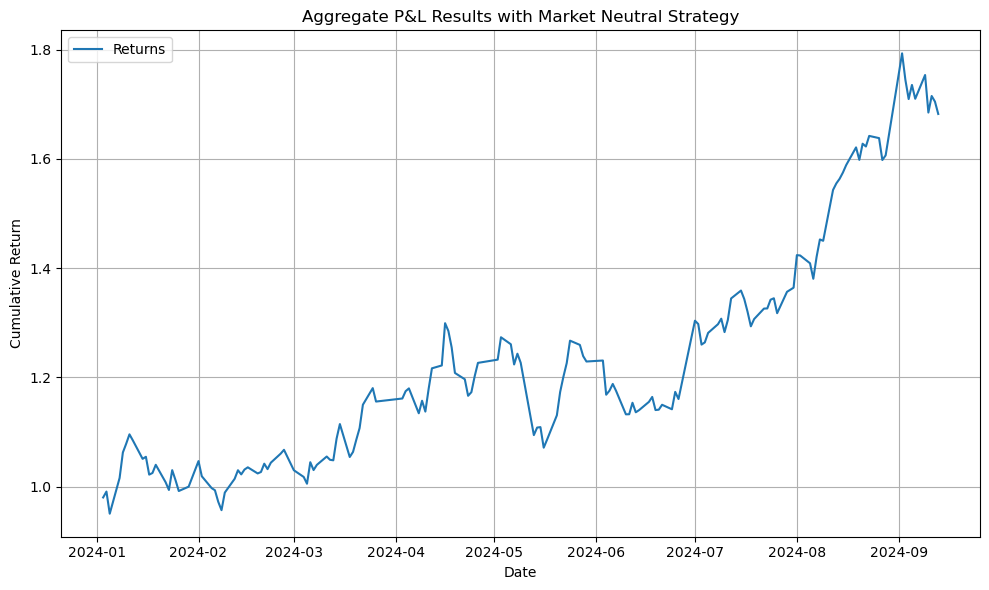

In [95]:
import matplotlib.pyplot as plt


def plot_aggregate_cumulative_return(aggregate_results):
    """
    Plots a single graph of the aggregate cumulative returns from the backtest.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(aggregate_results.index, aggregate_results['Aggregate_Cumulative_Return'], label='Returns')
    plt.title('Aggregate P&L Results with Market Neutral Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('BACKTESTINGRESULT.png')
    plt.show()

# Example usage:
# results, aggregate_results = financial_backtest_with_aggregate(predictions_vs_actuals)
plot_aggregate_cumulative_return(aggregate_results)


In [89]:
aggregate_results

,Aggregate_Daily_PnL,Aggregate_Cumulative_Return
Date,,
2024-01-03,-0.019900,0.980100
2024-01-04,0.010989,0.990870
2024-01-05,-0.040897,0.950347
2024-01-08,0.068804,1.015734
2024-01-09,0.046054,1.062513
2024-01-10,0.014945,1.078393
2024-01-11,0.015995,1.095641
2024-01-12,-0.009790,1.084915
2024-01-15,-0.031461,1.050782


In [92]:
len(aggregate_results)

163

In [93]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    """
    Calculate the Sharpe Ratio for a series of returns.

    Parameters:
    - returns (pd.Series): A series of returns.
    - risk_free_rate (float): The risk-free rate (default is 0.0).

    Returns:
    - sharpe_ratio (float): The Sharpe Ratio of the returns.
    """
    # Ensure returns is a pandas Series
    returns = pd.Series(returns)

    # Calculate the excess returns
    excess_returns = returns - risk_free_rate

    # Calculate the Sharpe Ratio
    sharpe_ratio = excess_returns.mean() / excess_returns.std()

    # Annualize if returns are daily
    sharpe_ratio_annualized = sharpe_ratio * np.sqrt(170)#/len(returns))  # 252 trading days in a year

    return sharpe_ratio_annualized


# Example usage
# Assume `daily_returns` is a pandas Series of daily returns from your backtest
daily_returns = aggregate_results['Aggregate_Daily_PnL']  # Replace with your actual returns series
sharpe_ratio = calculate_sharpe_ratio(daily_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Sharpe Ratio: 1.6995


In [96]:
def calculate_max_drawdown(cumulative_returns):
    """
    Calculate the maximum drawdown from a series of cumulative returns.

    Parameters:
    - cumulative_returns (pd.Series): Series of cumulative returns.

    Returns:
    - max_drawdown (float): Maximum drawdown as a percentage.
    - drawdown_duration (int): Duration of the maximum drawdown in trading days.
    """
    # Calculate the rolling maximum of cumulative returns
    rolling_max = cumulative_returns.cummax()

    # Calculate drawdown as the difference between the rolling max and the cumulative return
    drawdown = (cumulative_returns - rolling_max) / rolling_max

    # Find the maximum drawdown
    max_drawdown = drawdown.min()

    # Calculate drawdown duration
    end_of_drawdown = drawdown.idxmin()  # When the max drawdown occurred
    start_of_drawdown = (cumulative_returns[:end_of_drawdown] == rolling_max[:end_of_drawdown]).idxmax()
    drawdown_duration = (end_of_drawdown - start_of_drawdown).days

    return max_drawdown, drawdown_duration


In [97]:
# Assuming `cumulative_returns` is your series of cumulative returns
cumulative_returns = aggregate_results['Aggregate_Cumulative_Return']  # Replace with your data

# Calculate maximum drawdown and duration
max_drawdown, drawdown_duration = calculate_max_drawdown(cumulative_returns)

print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Drawdown Duration: {drawdown_duration} days")


Maximum Drawdown: -17.54%
Drawdown Duration: 134 days
